Script Práctica 2 Parte 1 (MLP clasificación)

Redes de Neuronas Artificiales, curso 2022-2023

Universidad Carlos III de Madrid

# Importar TensorFlow, ciertos módulos de Keras y las librerías numpy y pandas.

In [312]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report


#from tensorflow.keras import datasets, layers, models
#import matplotlib.pyplot as plt

# Cargar los datos

* Hay que ajustar el path a los csv de datos 
* Cambiar parámetros correspondientes si el delimitador no es una coma, o si el archivo contiene cabeceras
* Pueden cargarse numpy arrays o dataframes, en este caso se van a utilizar arrays

In [313]:
path = "content/"
inputFilename = "datos.csv"
Data_set = pd.read_csv(path+inputFilename, header='infer', delimiter=',')
# SEPARACIÓN ENTRADA Y SALIDA
y_Data_set = Data_set.iloc[:,-1:]
X_Data_set = Data_set.iloc[: , :-1]
# mediante prints es posible COMPROBAR DIMENSIONES DE LOS DATOS para comprobar que todo se haya cargado correctamente
print('Entrada(X_Data_set): ', X_Data_set.shape)
print('Salida(y_Data_set): ', y_Data_set.shape)

Entrada(X_Data_set):  (2126, 21)
Salida(y_Data_set):  (2126, 1)


# Preparación de datos

In [314]:
# Es posible usar funciones ya hechas
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [315]:
# SEPARACIÓN ENTRADA Y SALIDAA
y_Data_set = Data_set.iloc[:,-1:]
X_Data_set = Data_set.iloc[: , :-1]

#NORMALIZAR ENTRADAS
from sklearn.preprocessing import MinMaxScaler

# transform data
columnNames = X_Data_set.columns
scaler = MinMaxScaler()
X_Data_set_norma = scaler.fit_transform(X_Data_set)
X_Data_set_norma = pd.DataFrame(X_Data_set_norma, columns=columnNames)



#Dividir los datos en train y test de modo estratificado 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Data_set_norma, y_Data_set, stratify=y_Data_set, test_size=0.33)



# prints for debug
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(1424, 21)
(1424, 1)
(702, 21)
(702, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Despues de generar el dataset es posible guardarlo, para cargarlo en un futuro

In [316]:
# save to CSV file (using a copy not to modify the real data)
# Train
X_train_copy = X_train.copy()
X_train_copy['class'] = y_train # add the class to the file
pd.DataFrame(np.asarray(X_train_copy)).to_csv(path+"train.csv", header=Data_set.columns, index=False) # store it with the headers
# Test
X_test_copy = X_test.copy()
X_test_copy['class'] = y_test
pd.DataFrame(np.asarray(X_test_copy)).to_csv(path+"test.csv", header=Data_set.columns, index=False)

In [317]:
# Load CSV file
train_set = pd.read_csv(path+"train.csv", header='infer', delimiter=',')
test_set  = pd.read_csv(path+"test.csv",  header='infer', delimiter=',')
# Split in X and Y
y_train   = train_set.iloc[:,-1:]
X_train   = train_set.iloc[: , :-1]
y_test    = test_set.iloc[:,-1:]
X_test    = test_set.iloc[: , :-1]

In [318]:
# prints for debug
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

print(X_train)

(1424, 21)
(1424, 1)
(702, 21)
(702, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
            AC        FM        UC      ASTV      MSTV      ALTV      MLTV  \
0     0.307692  0.005319  0.086957  0.546667  0.235294  0.000000  0.063116   
1     0.000000  0.000000  0.391304  0.706667  0.147059  0.000000  0.124260   
2     0.000000  0.000000  0.000000  0.493333  0.088235  0.076923  0.272189   
3     0.000000  0.000000  0.000000  0.386667  0.102941  0.252747  0.209073   
4     0.153846  0.054965  0.260870  0.200000  0.323529  0.000000  0.266272   
...        ...       ...       ...       ...       ...       ...       ...   
1419  0.346154  0.005319  0.173913  0.573333  0.250000  0.000000  0.055227   
1420  0.461538  0.000000  0.478261  0.160000  0.191176  0.000000  0.033531   
1421  0.038462  0.576241  0.130435  0.173333  0.250000  0.000000  0.163708   
1422  0.153846  0.000000  0.

# Uso de semillas para hacer los procesos aleatorios reproducibles entre ejecuciones

In [319]:
from numpy.random import seed
from tensorflow.keras.utils import set_random_seed
semilla=2022 # segun la semilla, el futuro aleatorio funcionara siempre igual
seed(semilla)
set_random_seed(semilla)

# Comienzo código

In [320]:
# CONVERTIR TARGET A CATEGORICAL
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train_transformed = encoder.fit_transform(y_train)
y_test_transformed = encoder.fit_transform(y_test)
print("Entrenamiento salida sin transformar")
print(y_train[:11])
print("Entrenamiento salida transformada")
print(y_train_transformed[:11])

# COMPROBAR DIMENSIONES DE LOS DATOS
print("Entrenamiento input")
print(X_train.shape)
print("Entrenamiento output")
print(y_train.shape)
print("Entrenamiento output transformado")
print(y_train_transformed.shape)
print("Test input")
print(X_test.shape)
print("Test output")
print(y_test.shape)
print("Test output transformado")
print(y_test_transformed.shape)

Entrenamiento salida sin transformar
    NSP
0   1.0
1   1.0
2   1.0
3   1.0
4   1.0
5   1.0
6   1.0
7   1.0
8   1.0
9   1.0
10  1.0
Entrenamiento salida transformada
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]
Entrenamiento input
(1424, 21)
Entrenamiento output
(1424, 1)
Entrenamiento output transformado
(1424, 3)
Test input
(702, 21)
Test output
(702, 1)
Test output transformado
(702, 3)


In [321]:
#Extraer del conjunto de train el conjunto de validación
from sklearn.model_selection import train_test_split
X_train2, X_Validation, y_train_transformed2, y_Validation = train_test_split(X_train,y_train_transformed,stratify=y_train_transformed,test_size=0.2) 

# Criterios de parada

In [322]:
#OPCIÓN 1
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=1)
    #min_delta=1, 
    #mode='min')
callbacks_list=[early_stopping]

In [323]:
#OPCIÓN 2
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    path+'bestmodel', monitor='val_loss',
    #mode='min',
    verbose=1,
    save_best_only=True)
callbacks_list = [checkpoint]

In [324]:
# ASIGNAR PESOS Y DEFINIR UN DICCIONARIO
peso_claseN = 1.
peso_claseS = 5.  # Trata cada instancia de clase 1 como 5 instancias de clase 0
peso_claseP = 7. # Trata cada instancia de clase 2 como 10 instancias de clase 0
class_weight = { # Diccionaro de pesos
    0: peso_claseN,
    1: peso_claseS,
    2: peso_claseP
}

In [325]:
#ASIGNAR PESOS DE MANERA AUTOMÁTICA, 
from sklearn.utils import class_weight

pesos = class_weight.compute_class_weight( # total/numclasses*repeticiones de la clase
    'balanced',
    classes = np.unique(y_train),
    y       = y_train.NSP.to_numpy()
)
print(pesos)

#CREACIÓN DEL DICCIONARIO
class_weight = {
    0: int(pesos[0]+1),
    1: int(pesos[1]*2),
    2: int(pesos[2]*3)
}

print(class_weight)

[0.42839952 2.3973064  4.02259887]
{0: 1, 1: 4, 2: 12}


# Definir el modelo de red neuronal

In [326]:
# Definir forma de la entrada de la red
input_shape=(X_train.shape [1],) # utilizamos los datos de entrenamiento para definir la tupla
# Definir la salida de la red, la ultima capa debera tener una neurona por cada clase
num_clases =y_test_transformed.shape [1] # definimos el numero de clases que queremos que tenga la salida
# imprimir información de la red
print(num_clases)
print(train_set.NSP.value_counts())
print(test_set.NSP.value_counts())

3
1.0    1108
2.0     198
3.0     118
Name: NSP, dtype: int64
1.0    547
2.0     97
3.0     58
Name: NSP, dtype: int64


In [327]:
#DEFINICIÓN DEL MODELO
model = Sequential()
# Capa de entrada del modelo
model.add(Dense(50, input_shape=input_shape, activation='sigmoid'))
# Capas intermedias del modelo

# Capa de salida del modelo
model.add(Dense(num_clases, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 50)                1100      
                                                                 
 dense_41 (Dense)            (None, 3)                 153       
                                                                 
Total params: 1,253
Trainable params: 1,253
Non-trainable params: 0
_________________________________________________________________


In [328]:
#Cambiar

In [329]:
# Hiperparametros
lr = 0.95 # razon de aprendizaje
momento=0
epochs = 200 # numero de ciclos que se quiere realizar en el entrenamiento
batch_size=32
optimizador=tf.keras.optimizers.SGD(learning_rate=lr, momentum=momento)
#lr=1e-3
#optimizador=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
#rho=0.9
#lr=0.001
#optimizador=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9), 

In [330]:
#COMPILACIÓN DEL MODELO
from keras.losses import binary_crossentropy
model.compile( 
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr, momentum=momento),
    #optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
    loss='mean_squared_error',
    #loss='binary_crossentropy',
    metrics=['accuracy','mse']
)

In [331]:
#Cambiar

In [332]:
#ENTRENAMIENTO DEL MODELO
opcion=2

if opcion==2:
  callbacks_list=[early_stopping]

historico = model.fit(X_train2, y_train_transformed2, 
                      epochs=epochs, batch_size=1, verbose=1, validation_data=(X_Validation,y_Validation), shuffle=False,
                      callbacks=callbacks_list,
                      class_weight=class_weight)

Epoch 1/200
1139/1139 [==============================] - 2s 1ms/step - loss: 1.1898 - accuracy: 0.1361 - mse: 0.5750 - val_loss: 0.5731 - val_accuracy: 0.1404 - val_mse: 0.5731
Epoch 2/200
1139/1139 [==============================] - 1s 1ms/step - loss: 1.1858 - accuracy: 0.1387 - mse: 0.5742 - val_loss: 0.5731 - val_accuracy: 0.1404 - val_mse: 0.5731


# Análisis

In [333]:
#GUARDAR RESULTADOS Y MODELOS EN FICHEROS
#CUANDO SE UTILIZA CHECKPOINT, YA ESTÁ GUARDADO EL MODELO
#CUANDO SE UTILIZA EARLY_STOPING, REALMENTE EL MODELO YA ESTÁ EN "MODEL", PERO SI SE QUIERE GUARDAR EN FICHERO SE DEBE UTILIZAR MODEL.SAVE

np.savetxt(path+'historicoTrainLoss.txt',historico.history['loss'])
np.savetxt(path+'historicoValLoss.txt',historico.history['val_loss'])
np.savetxt(path+'historicoTrainAcc.txt',historico.history['accuracy'])
np.savetxt(path+'historicoValAcc.txt',historico.history['val_accuracy'])

if opcion==1:
    model.save(path+'model_early_stoping')

In [334]:
#LOSS Y ACCURACY DE TRAIN Y VALIDACIÓN CUANDO SE UTILIZA EARLY_STOPPING
final_epoch = len(historico.history['loss'])
print(historico.history['loss'][final_epoch-1])
print(historico.history['val_loss'][final_epoch-1])
print(historico.history['accuracy'][final_epoch-1])
print(historico.history['val_accuracy'][final_epoch-1])

1.1858325004577637
0.573099672794342
0.13871817290782928
0.14035087823867798


In [335]:
#MEJOR ÉPOCA, LOSS Y ACCURACY DE TRAIN Y VALIDACIÓN CUANDO SE UTILIZA CHECKPOINT
epochs_stop = np.where(historico.history['val_loss'] == np.min(historico.history['val_loss']))
final_epoch = epochs_stop[0][0]
print(final_epoch)
print(historico.history['loss'][final_epoch-1])
print(historico.history['val_loss'][final_epoch-1])
print(historico.history['accuracy'][final_epoch-1])
print(historico.history['val_accuracy'][final_epoch-1])

0
1.1858325004577637
0.573099672794342
0.13871817290782928
0.14035087823867798


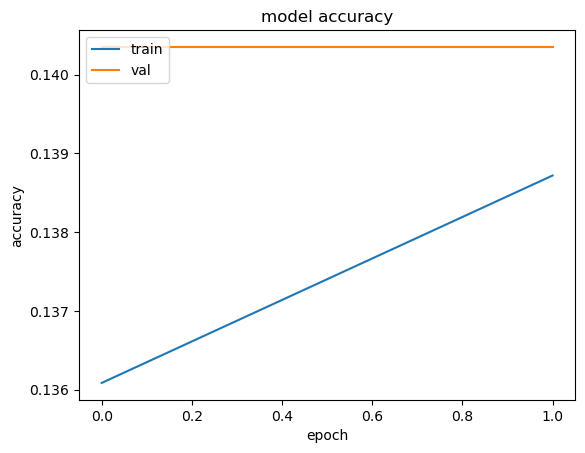

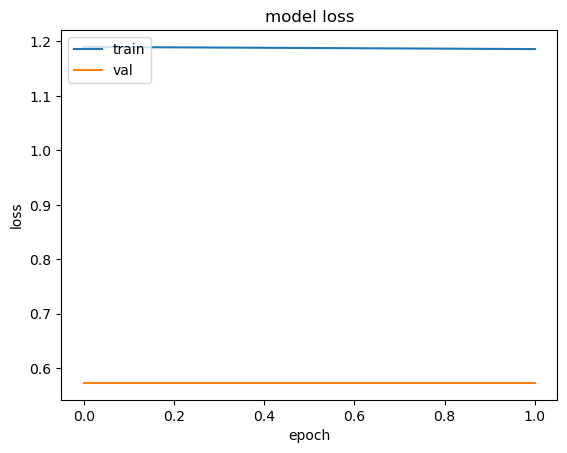

In [336]:
## plots de evolución de loss y accuracy
from matplotlib import pyplot as plt
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Modelo final
Entrenamiento final sin validation

In [337]:
#Cambiar

In [338]:
# DEFINIR Y ENTRENAR EL MODELO DEFINITIVO, CON LOS MEJORES HIPERPARÁMETROS
# ejemplo:
num_neuronas = 50
lr           = 0.1
momento      = 0
epochs       = 5
class_weight = {
    0: 1.,
    1: 5.,
    2: 10.
}

#definir modelo
final_model = Sequential()
final_model.add(Dense(num_neuronas, input_shape=input_shape, activation='sigmoid'))
final_model.add(Dense(num_clases, activation='softmax'))

#COMPILAR
final_model.compile( 
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr, momentum=momento),
    #optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
    loss='mean_squared_error',
    #loss='binary_crossentropy',
    metrics=['accuracy','mse', 'binary_crossentropy']
)

#ENTRENAR
historico=final_model.fit(
    X_train, y_train_transformed, epochs=epochs, 
    batch_size=1, verbose=1, validation_split=0, shuffle=False, class_weight=class_weight
)

Epoch 1/5
1424/1424 [==============================] - 2s 1ms/step - loss: 0.5329 - accuracy: 0.5000 - mse: 0.2202 - binary_crossentropy: 0.6759
Epoch 2/5
1424/1424 [==============================] - 2s 1ms/step - loss: 0.3473 - accuracy: 0.7395 - mse: 0.1276 - binary_crossentropy: 0.5215
Epoch 3/5
1424/1424 [==============================] - 2s 1ms/step - loss: 0.3023 - accuracy: 0.7739 - mse: 0.1092 - binary_crossentropy: 0.4910
Epoch 4/5
1424/1424 [==============================] - 2s 1ms/step - loss: 0.2793 - accuracy: 0.7886 - mse: 0.1009 - binary_crossentropy: 0.4795
Epoch 5/5
1424/1424 [==============================] - 2s 1ms/step - loss: 0.2642 - accuracy: 0.7985 - mse: 0.0958 - binary_crossentropy: 0.4725


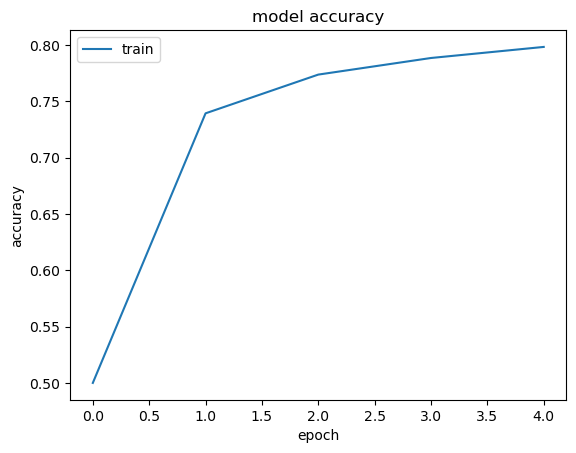

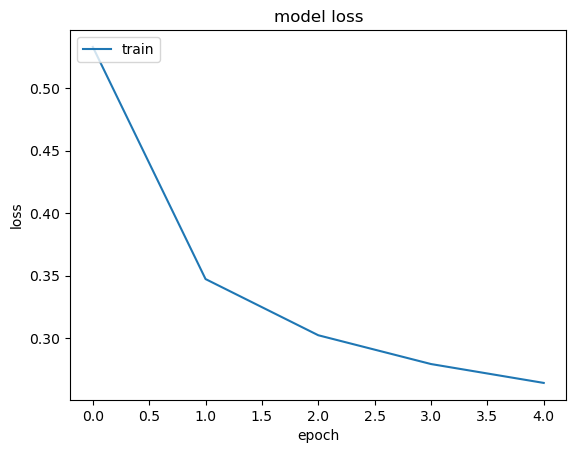

In [339]:
## plots de evolución de loss y accuracy
from matplotlib import pyplot as plt
plt.plot(historico.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(historico.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [340]:
#Cambiar

In [341]:
# EVALUAR MODELO 
train_results = final_model.evaluate(X_train, y_train_transformed, verbose=1)
test_results = final_model.evaluate(X_test, y_test_transformed, verbose=1)

#EL INDICE 0 ES EL LOSS, EL RESTO LAS MÉTRICAS DEFINADAS ARRIBA. EN ESTE CASO 'accuracy':1,'mse':2 
print(f'Train results - Loss: {train_results[0]} - Accuracy: {train_results[1]} - MSE: {train_results[2]} ')
print(f'Test results  - Loss: {test_results[0]}  - Accuracy: {test_results[1]} - MSE: {test_results[2]} ')

22/22 [==============================] - 0s 1ms/step - loss: 0.1592 - accuracy: 0.6425 - mse: 0.1592 - binary_crossentropy: 0.5944
Train results - Loss: 0.16332869231700897 - Accuracy: 0.6271067261695862 - MSE: 0.16332869231700897 
Test results  - Loss: 0.1592470109462738  - Accuracy: 0.6424501538276672 - MSE: 0.1592470109462738 


In [342]:
# PREDICCIONES EN BRUTO
raw_testPred = final_model.predict(X_test)
#prediccion de los 5 primeros patrones de test: 5 vectores con valores reales 
print(raw_testPred[:5])

# PREDICCIONES DE LAS CLASES
testPred = np.argmax(raw_testPred, axis=1)
#transformar el núm de col en la etiqueta
class_testPred = encoder.classes_[testPred]
print(class_testPred[:5])

#MATRIZ DE CONFUSIÓN Y OTRAS MÉTRICAS COMO RECALL
cm=confusion_matrix(y_test, class_testPred)
print(cm)
print('Classification Report')
print(classification_report(y_test, class_testPred))

22/22 [==============================] - 0s 953us/step
[[0.0939787  0.15844579 0.7475755 ]
 [0.84961057 0.1411876  0.00920185]
 [0.67367965 0.29758176 0.02873851]
 [0.6402007  0.27899265 0.08080675]
 [0.6048132  0.37816513 0.01702166]]
[3. 1. 1. 1. 1.]
[[338 148  61]
 [  3  59  35]
 [  1   3  54]]
Classification Report
              precision    recall  f1-score   support

         1.0       0.99      0.62      0.76       547
         2.0       0.28      0.61      0.38        97
         3.0       0.36      0.93      0.52        58

    accuracy                           0.64       702
   macro avg       0.54      0.72      0.55       702
weighted avg       0.84      0.64      0.69       702

